# Decision Tree

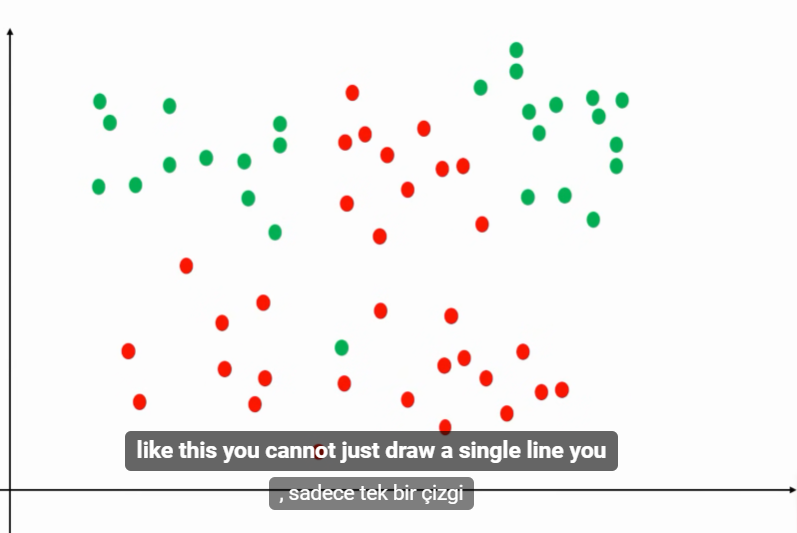 

Veri seti böyle olduğunda tek bir çizgi ile çözmek zor. 



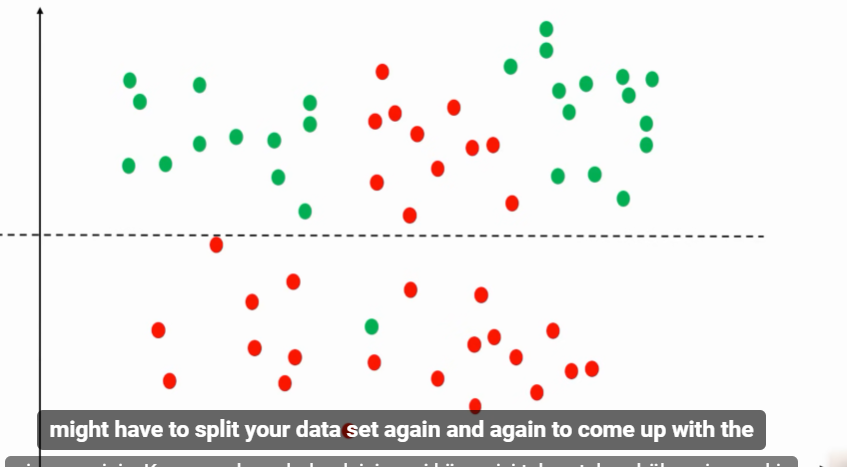 

Bunun gibi bir çizgi çizilebilir ama bundan sonra da tekrar tekrar bölmek gerekir. 

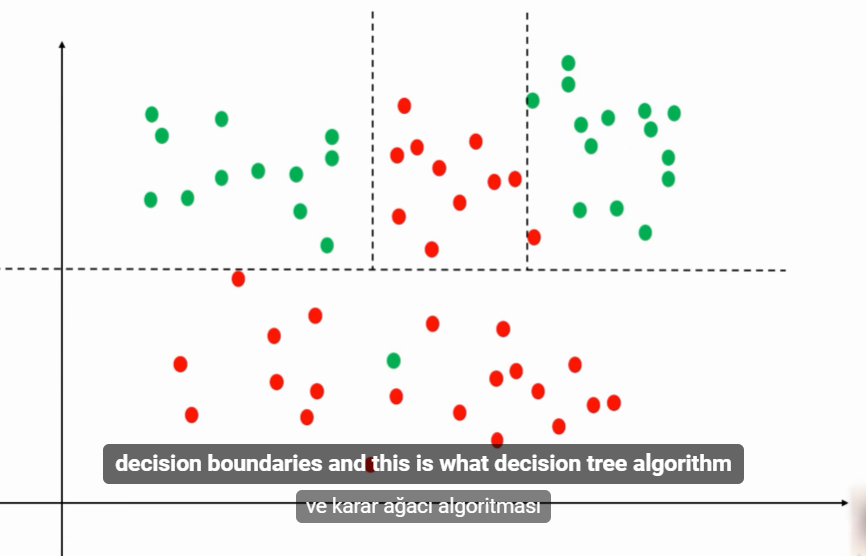

Karar ağaçları bunu bizim yerimize yapar. 


Karar Ağacı uygulama örneğinde kullanılacak veri seti;
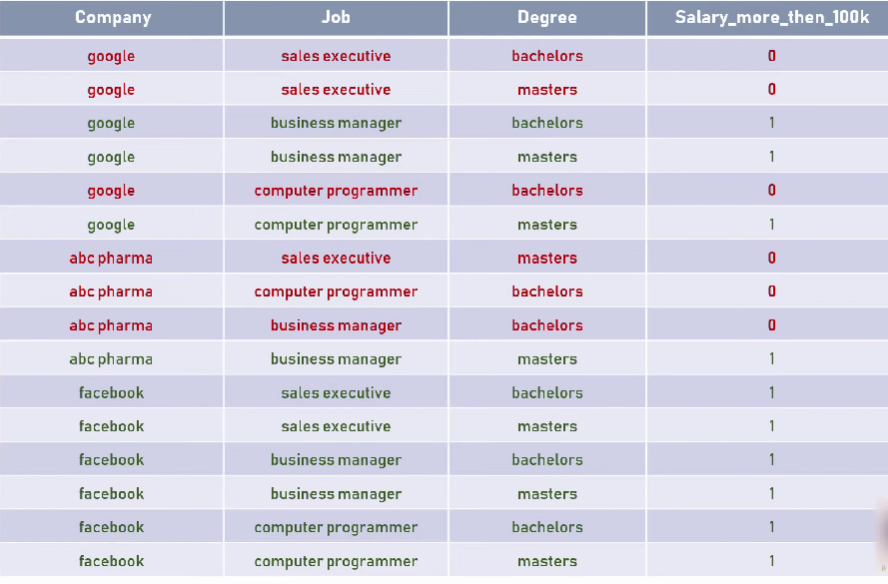

Burada kişinin maaşının şirket bazında 100 binden fazla olup olmadığını tahmin etmeye çalışacağız. 

Böyle bir sorun çözülmek istendiğinde yapılıcak ilk şey özelliklere göre karar ağacı oluşturmak.  

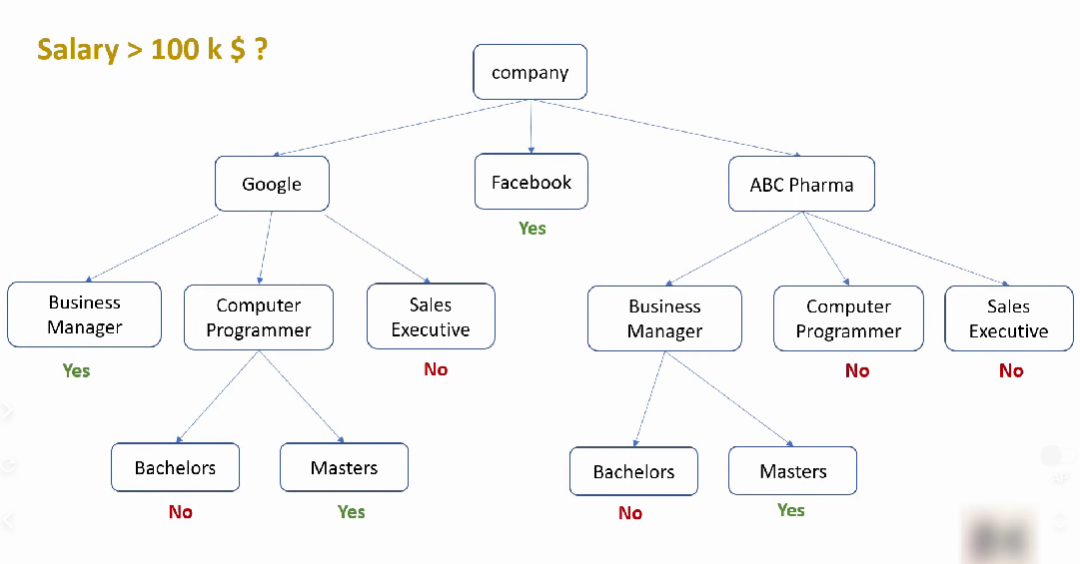


#### Özellikleri seçmek

Burada önemli olan doğru sırayla özellikleri seçmek. Bu örnek için basitçe oluşabiliyor ama veri setleri büyüdüğünde seçmek zorlaşabilir.

Burada yapılacak ilk şey şirkete göre ayırmak ancak dereceye göre belirleseydik böyle net olmayan bir adım karşımıza çıkardı;
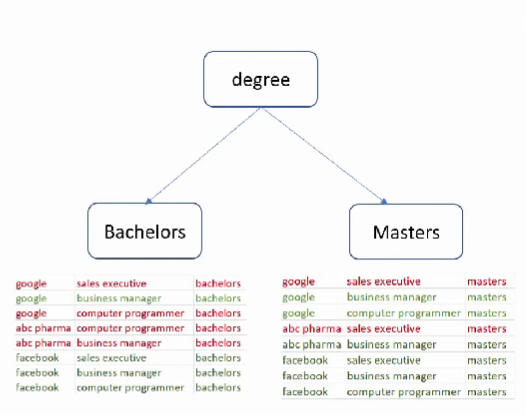

Normalde seçimi şirkete göre yaptığımızda doğru bir ayrım oluşur.
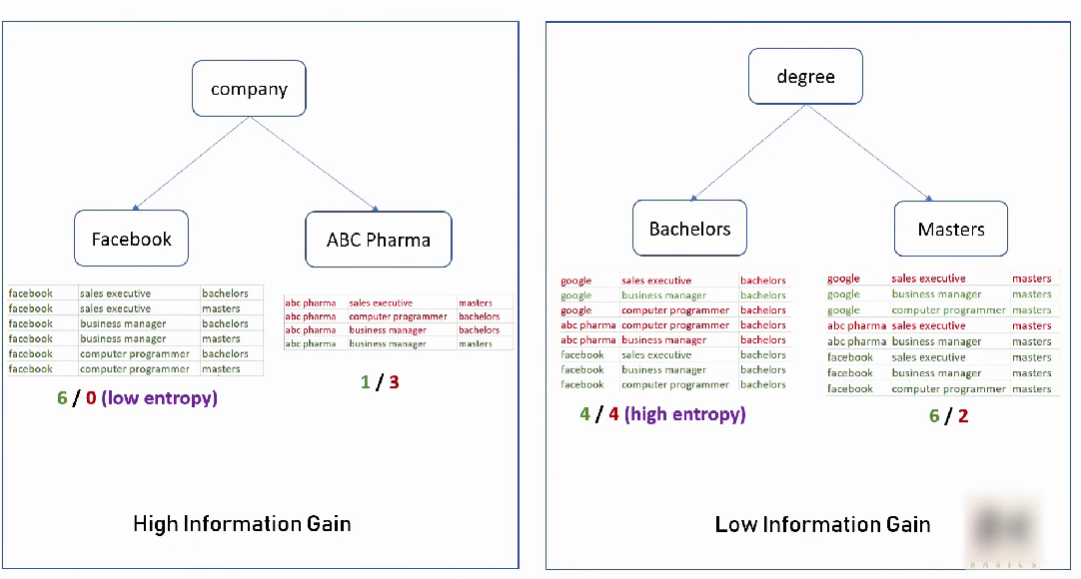

Bu düşük bir entropi ve yüksek bilgi kazancı demektir.
Her zaman karar bölmesi oluştururken yüksek kazanç olan seçilmelidir.

In [27]:
import pandas as pd
df=pd.read_csv("Decision Tree-salaries.csv")
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


Bundan sonra makine eğitirken adım adım yapılacaklar;

1) öncelikle hedef değişkenleri (target variable) ve bağımsız değişkenleri (independent variable) belirlemek.

2) Bu veri setinde veriler string ifadeler ancak makine öğrenmesinde sayılarla işlem yapıldığından bundan kurtulmak için label encoder kullanabiliriz.
* From sklearn.preprocessing import LabelEncoder
Label encoder kullanılırlen 3 farklı özellik olduğundan 3 farklı encoder olur.

3) Ardından giriş frame 'e bir sütun daha eklenir. Bunu .fit_transform() özelliği ile yapabiliriz. 3 tane sütunda veriler string olduğundan her biri için bu yapılır. Sonuç olarak 3 yeni sütun eklenmiş olur. 
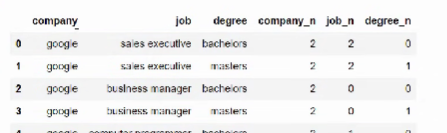

4) her biri için aslında dönüşüm yapıldığından string olan sütunlar çıkarılır. 
ÖR: google 2, facebook 1 gibi..

Verilerin düzenlenmesi tamamlandıktan sonra eğitme işlemleri yapılır. 

1) karar ağacı modülleri eklenir.
* from sklearn import tree
* model = tree.DecisionTreeClassifier 

2) ardından model eğitilir. 
* model.fit()

* Bundan önce (eğitimden önce) modele bölme işlemi eklenmesi daha mantıklı 

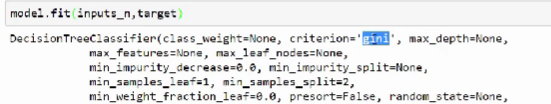 
Burada bulunan criterion iki seçenektir. 
Entropi veya gibi seçilebilir.

* Gini; 
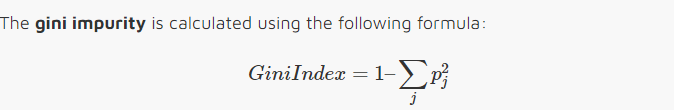


* entropy;
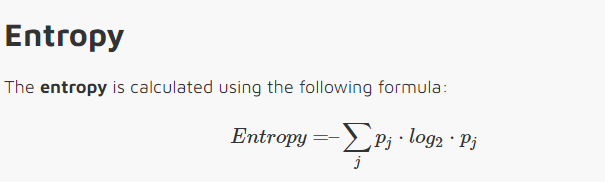


iki arasındaki fark; 
* Gini [0, 0.5]  arasındayken, Entropy [0, 1] arasındadır. 


* Hesaplamalı olarak, entropi logaritma kullandığından daha karmaşıktır ve sonuç olarak Gini Endeksinin hesaplanması daha hızlı olacaktır.



### Code

In [28]:
inputs= df.drop('salary_more_then_100k', axis='columns')
target= df["salary_more_then_100k"]

In [29]:
from sklearn.preprocessing import LabelEncoder
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [30]:
inputs['company_n'] = le_company.fit_transform(inputs['company'])
inputs['job_n'] = le_job.fit_transform(inputs['job'])
inputs['degree_n'] = le_degree.fit_transform(inputs['degree'])

In [31]:
inputs

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [32]:
inputs= inputs.drop(['company', 'job','degree'], axis="columns")

In [33]:
inputs

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [34]:
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
xtrain, xtest, ytrain, ytest= train_test_split(inputs, target, test_size= 0.1)

In [37]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [38]:
model.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [39]:
model.score(xtest, ytest)

1.0

In [40]:
model.predict([[2,1,0]])

array([0], dtype=int64)

## Exercise

Titanic verileri olacak ve bu veriler yolcuların hayatta kalma oranlarını gösteriyor.

içindeki verilerden survived, pclass, sex, age ve fare sütunları dikkate alınarak yapılmalı. 

In [58]:
df2= pd.read_csv("Decision-Tree-exercise-Titanic_video9.csv")
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [59]:
df2.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)
df2.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [60]:
targets=df2.Survived
inputt= df2.drop("Survived", axis="columns")

In [61]:
le_sex=LabelEncoder()
#inputs['degree_n'] = le_degree.fit_transform(inputs['degree'])

In [62]:
inputt["sexnum"]= le_sex.fit_transform(inputt["Sex"])

In [63]:
inputt.head()

,Pclass,Sex,Age,Fare,sexnum
0,3,male,22.0,7.2500,1
1,1,female,38.0,71.2833,0
2,3,female,26.0,7.9250,0
3,1,female,35.0,53.1000,0
4,3,male,35.0,8.0500,1


In [67]:
inputt= inputt.drop('Sex',axis='columns')
inputt.head()

,Pclass,Age,Fare,sexnum
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1


In [72]:
# eksik veriler var ve doldurmak gerekiyor. 
inputt.Age = inputt.Age.fillna(inputt.Age.mean())

In [73]:
X_train, X_test, Y_train, Y_test= train_test_split(inputt,targets, test_size=0.2)

In [74]:
model2= tree.DecisionTreeClassifier()

In [75]:
model2.fit(X_train,Y_train)

DecisionTreeClassifier()

In [76]:
model2.score(X_test,Y_test)

0.7430167597765364